In [1]:
import pandas as pd

In [2]:
wti = pd.read_csv('data/WTI.csv', parse_dates=True, index_col='date', dayfirst=True).sort_index()

In [3]:
wti_pct = wti.pct_change().dropna()

<AxesSubplot:xlabel='date'>

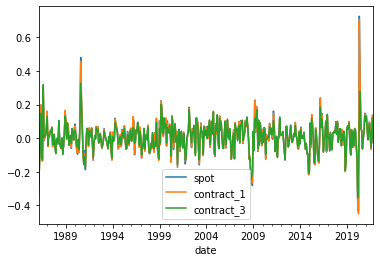

In [4]:
wti_pct.plot()

In [5]:
from statsmodels.tsa.stattools import adfuller

In [6]:
adf_spot = adfuller(wti_pct.spot)

In [7]:
print(adf_spot[1])

4.8758366644476025e-21


In [8]:
adf_1 = adfuller(wti_pct.contract_1)
print(adf_1[1])

4.483680441028699e-21


In [9]:
adf_3 = adfuller(wti_pct.contract_3)
print(adf_3[1])

1.1115252565622783e-22


In [10]:
epu = pd.read_csv('data/EPUGlobal.csv', parse_dates=True, index_col='date', dayfirst=True).sort_index()

In [11]:
epu_shock = epu.pct_change().diff(-1).dropna()
epu_shock = epu_shock.loc[(epu_shock!=0).any(axis=1)]

<AxesSubplot:xlabel='date'>

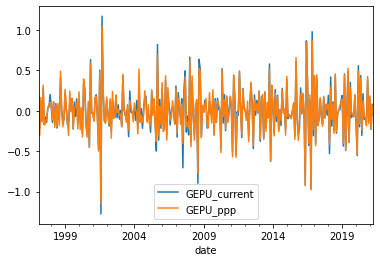

In [12]:
epu_shock.plot()

In [13]:
adf_gepu = adfuller(epu_shock.GEPU_current)
print(adf_gepu[1])

2.304215626134447e-12


In [14]:
import statsmodels.api as sm

In [15]:
df = wti_pct.join(epu_shock).dropna()
df.tail()

,spot,contract_1,contract_3,GEPU_current,GEPU_ppp
date,,,,,
2020-12-01,0.148510,0.144420,0.135797,-0.132958,-0.158564
2021-01-01,0.105912,0.106862,0.098648,0.164491,0.184622
2021-02-01,0.135385,0.133589,0.127283,-0.227285,-0.226915
2021-03-01,0.055725,0.055875,0.058332,0.083099,0.067345
2021-04-01,-0.009787,-0.010584,-0.008380,-0.051680,-0.028355


In [16]:
def news_regression(y_col, x_col, lags=12, df=df):
    x_cols = []
    for i in range(lags+1):
        new_col = f'{x_col}-lag{i}'
        df[new_col] = df[f'{x_col}'].shift(-i)
        x_cols.append(new_col)
    df = df.dropna()
    return sm.OLS(df[y_col], sm.add_constant(df[x_cols])).fit()

In [17]:
model1 = news_regression('spot', 'GEPU_current')

In [18]:
model1.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.065
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     1.632
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0763
Time:                        21:38:33   Log-Likelihood:                 280.13
No. Observations:                 279   AIC:                            -532.3
Df Residuals:                     265   BIC:                            -481.4
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0031      0.005      0.564      0.573      -0.008       0.014
GEPU_current-lag0     -0.0639      0.034     -1.901      0.058      -0.130       0.002
GEPU_current-lag1     -0.0693      0.048     -1.432      0.153      -0.164       0.026
GEPU_current-lag2     -0.0507      0.058     -0.870      0.385      -0.165       0.064
GEPU_current-lag3      0.0085      0.063      0.134      0.894      -0.116       0.133
GEPU_current-lag4      0.0157      0.070      0.225      0.822      -0.122       0.153
GEPU_current-lag5      0.0267      0.071      0.376      0.707      -0.113       0.167
GEPU_current-lag6      0.0260      0.070      0.371      0.711      -0.112       0.164
GEPU_current-lag7     -0.0175      0.072     -0.242      0.809      -0.159       0.124
GEPU_current-lag8      0.0264      0.072      0.368      0.713      -0.115       0.168
GEPU_current-lag9      0.0059      0.063      0.094      0.925      -0.118       0.130
GEPU_current-lag10     0.0058      0.051      0.114      0.909      -0.095       0.106
GEPU_current-lag11     0.0062      0.039      0.161      0.873      -0.070       0.082
GEPU_current-lag12     0.0038      0.023      0.163      0.871      -0.042       0.050
==============================================================================
Omnibus:                       50.118   Durbin-Watson:                   1.321
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              114.434
Skew:                          -0.870   Prob(JB):                     1.42e-25
Kurtosis:                       5.611   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [19]:
model2 = news_regression('contract_1', 'GEPU_current')
model2.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     1.663
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0689
Time:                        21:38:33   Log-Likelihood:                 281.66
No. Observations:                 279   AIC:                            -535.3
Df Residuals:                     265   BIC:                            -484.5
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0030      0.005      0.563      0.574      -0.008       0.014
GEPU_current-lag0     -0.0658      0.032     -2.038      0.043      -0.129      -0.002
GEPU_current-lag1     -0.0734      0.047     -1.564      0.119      -0.166       0.019
GEPU_current-lag2     -0.0526      0.056     -0.936      0.350      -0.163       0.058
GEPU_current-lag3      0.0056      0.062      0.091      0.928      -0.116       0.127
GEPU_current-lag4      0.0130      0.068      0.191      0.848      -0.121       0.147
GEPU_current-lag5      0.0253      0.069      0.365      0.715      -0.111       0.161
GEPU_current-lag6      0.0236      0.069      0.345      0.730      -0.111       0.159
GEPU_current-lag7     -0.0183      0.071     -0.259      0.796      -0.157       0.121
GEPU_current-lag8      0.0253      0.070      0.361      0.719      -0.113       0.163
GEPU_current-lag9      0.0060      0.062      0.097      0.923      -0.115       0.127
GEPU_current-lag10     0.0071      0.050      0.143      0.887      -0.091       0.106
GEPU_current-lag11     0.0063      0.038      0.166      0.868      -0.069       0.081
GEPU_current-lag12     0.0037      0.023      0.159      0.874      -0.042       0.049
==============================================================================
Omnibus:                       49.481   Durbin-Watson:                   1.320
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.523
Skew:                          -0.857   Prob(JB):                     2.23e-25
Kurtosis:                       5.612   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [20]:
model3 = news_regression('contract_3', 'GEPU_current')
model3.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_3   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     1.451
Date:                Thu, 30 Dec 2021   Prob (F-statistic):              0.136
Time:                        21:38:33   Log-Likelihood:                 320.02
No. Observations:                 279   AIC:                            -612.0
Df Residuals:                     265   BIC:                            -561.2
Df Model:                          13                                         
Covariance Type:                  HC1                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0037      0.005      0.792      0.429      -0.006       0.013
GEPU_current-lag0     -0.0647      0.029     -2.211      0.028      -0.122      -0.007
GEPU_current-lag1     -0.0648      0.041     -1.589      0.113      -0.145       0.015
GEPU_current-lag2     -0.0505      0.050     -1.007      0.315      -0.149       0.048
GEPU_current-lag3     -0.0005      0.055     -0.009      0.993      -0.109       0.108
GEPU_current-lag4      0.0119      0.061      0.195      0.846      -0.108       0.132
GEPU_current-lag5      0.0304      0.062      0.492      0.623      -0.091       0.152
GEPU_current-lag6      0.0332      0.060      0.549      0.583      -0.086       0.152
GEPU_current-lag7      0.0109      0.060      0.182      0.855      -0.107       0.128
GEPU_current-lag8      0.0366      0.060      0.608      0.544      -0.082       0.155
GEPU_current-lag9      0.0167      0.053      0.315      0.753      -0.088       0.121
GEPU_current-lag10     0.0129      0.044      0.291      0.771      -0.074       0.100
GEPU_current-lag11     0.0131      0.034      0.386      0.700      -0.054       0.080
GEPU_current-lag12     0.0067      0.021      0.324      0.746      -0.034       0.047
==============================================================================
Omnibus:                       22.467   Durbin-Watson:                   1.426
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               28.578
Skew:                          -0.601   Prob(JB):                     6.23e-07
Kurtosis:                       4.007   Cond. No.                         31.3
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [21]:
import matplotlib.pyplot as plt

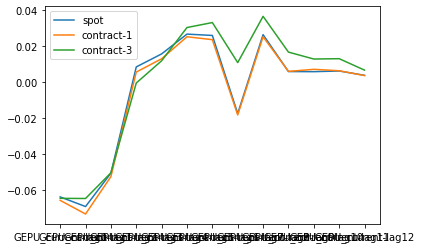

In [22]:
plt.plot(model1.params[1:], label='spot')
plt.plot(model2.params[1:], label='contract-1')
plt.plot(model3.params[1:], label='contract-3')
plt.legend()

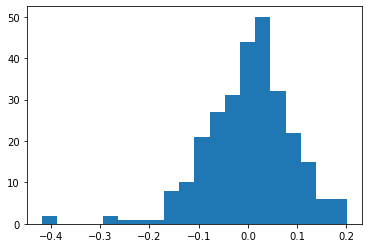

In [23]:
plt.hist(model1.resid, bins=20)
plt.show()

<AxesSubplot:xlabel='date'>

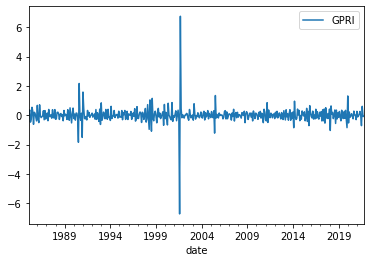

In [24]:
gpr = pd.read_csv('data/GPRGlobal.csv', parse_dates=True, index_col='date', dayfirst=True).sort_index()
gpr_shock = gpr.pct_change().diff(-1).dropna()
gpr_shock = gpr_shock.loc[(gpr_shock!=0).any(axis=1)]
gpr_shock.plot()

In [25]:
adf_gpr = adfuller(gpr_shock.GPRI)
print(adf_gpr[1])

3.201947929182281e-16


In [26]:
df1 = wti_pct.join(gpr_shock)

In [27]:
model4 = news_regression('spot', 'GPRI', df=df1)
model4.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   spot   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                     1.800
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0410
Time:                        21:38:33   Log-Likelihood:                 379.10
No. Observations:                 417   AIC:                            -730.2
Df Residuals:                     403   BIC:                            -673.7
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.005      1.264      0.207      -0.003       0.016
GPRI-lag0      0.0086      0.016      0.525      0.600      -0.024       0.041
GPRI-lag1      0.0159      0.017      0.949      0.343      -0.017       0.049
GPRI-lag2      0.0074      0.016      0.452      0.652      -0.025       0.040
GPRI-lag3      0.0112      0.017      0.652      0.515      -0.023       0.045
GPRI-lag4      0.0229      0.018      1.304      0.193      -0.012       0.057
GPRI-lag5      0.0221      0.022      1.017      0.310      -0.021       0.065
GPRI-lag6      0.0103      0.020      0.524      0.600      -0.028       0.049
GPRI-lag7     -0.0006      0.016     -0.039      0.969      -0.033       0.032
GPRI-lag8      0.0050      0.014      0.369      0.712      -0.022       0.032
GPRI-lag9     -0.0147      0.012     -1.220      0.223      -0.038       0.009
GPRI-lag10    -0.0153      0.010     -1.469      0.143      -0.036       0.005
GPRI-lag11    -0.0140      0.008     -1.671      0.096      -0.030       0.002
GPRI-lag12    -0.0063      0.006     -1.061      0.289      -0.018       0.005
==============================================================================
Omnibus:                      109.580   Durbin-Watson:                   1.495
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1513.357
Skew:                           0.688   Prob(JB):                         0.00
Kurtosis:                      12.231   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [28]:
model5 = news_regression('contract_1', 'GPRI', df=df1)
model5.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_1   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                     1.707
Date:                Thu, 30 Dec 2021   Prob (F-statistic):             0.0571
Time:                        21:38:33   Log-Likelihood:                 382.16
No. Observations:                 417   AIC:                            -736.3
Df Residuals:                     403   BIC:                            -679.8
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0061      0.005      1.260      0.208      -0.003       0.016
GPRI-lag0      0.0063      0.016      0.387      0.699      -0.026       0.038
GPRI-lag1      0.0128      0.017      0.777      0.438      -0.020       0.045
GPRI-lag2      0.0043      0.016      0.262      0.793      -0.028       0.036
GPRI-lag3      0.0085      0.017      0.495      0.621      -0.025       0.042
GPRI-lag4      0.0207      0.018      1.171      0.242      -0.014       0.055
GPRI-lag5      0.0201      0.021      0.938      0.349      -0.022       0.062
GPRI-lag6      0.0088      0.019      0.450      0.653      -0.029       0.047
GPRI-lag7     -0.0008      0.016     -0.049      0.961      -0.033       0.031
GPRI-lag8      0.0042      0.014      0.310      0.757      -0.022       0.031
GPRI-lag9     -0.0151      0.012     -1.266      0.206      -0.039       0.008
GPRI-lag10    -0.0151      0.010     -1.449      0.148      -0.036       0.005
GPRI-lag11    -0.0142      0.008     -1.706      0.089      -0.031       0.002
GPRI-lag12    -0.0060      0.006     -1.017      0.310      -0.018       0.006
==============================================================================
Omnibus:                      102.992   Durbin-Watson:                   1.498
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1350.700
Skew:                           0.631   Prob(JB):                    5.00e-294
Kurtosis:                      11.726   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

In [29]:
model6 = news_regression('contract_3', 'GPRI', df=df1)
model6.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             contract_3   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                 -0.014
Method:                 Least Squares   F-statistic:                     1.457
Date:                Thu, 30 Dec 2021   Prob (F-statistic):              0.131
Time:                        21:38:34   Log-Likelihood:                 469.92
No. Observations:                 417   AIC:                            -911.8
Df Residuals:                     403   BIC:                            -855.4
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0047      0.004      1.192      0.234      -0.003       0.012
GPRI-lag0      0.0038      0.011      0.343      0.732      -0.018       0.025
GPRI-lag1      0.0085      0.012      0.730      0.466      -0.014       0.032
GPRI-lag2     -0.0008      0.012     -0.067      0.947      -0.024       0.022
GPRI-lag3      0.0023      0.013      0.172      0.863      -0.024       0.028
GPRI-lag4      0.0114      0.014      0.819      0.413      -0.016       0.039
GPRI-lag5      0.0123      0.016      0.750      0.454      -0.020       0.044
GPRI-lag6      0.0062      0.015      0.415      0.678      -0.023       0.036
GPRI-lag7      0.0019      0.013      0.142      0.887      -0.024       0.028
GPRI-lag8      0.0025      0.011      0.223      0.824      -0.019       0.024
GPRI-lag9     -0.0132      0.010     -1.334      0.183      -0.033       0.006
GPRI-lag10    -0.0156      0.008     -1.858      0.064      -0.032       0.001
GPRI-lag11    -0.0149      0.007     -2.175      0.030      -0.028      -0.001
GPRI-lag12    -0.0076      0.005     -1.622      0.106      -0.017       0.002
==============================================================================
Omnibus:                       32.154   Durbin-Watson:                   1.382
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              104.914
Skew:                          -0.252   Prob(JB):                     1.65e-23
Kurtosis:                       5.405   Cond. No.                         12.7
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

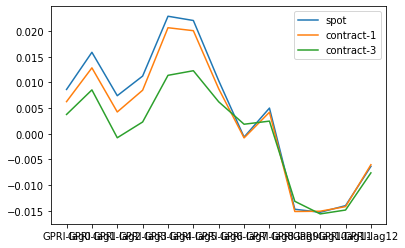

In [30]:
plt.plot(model4.params[1:], label='spot')
plt.plot(model5.params[1:], label='contract-1')
plt.plot(model6.params[1:], label='contract-3')
plt.legend()

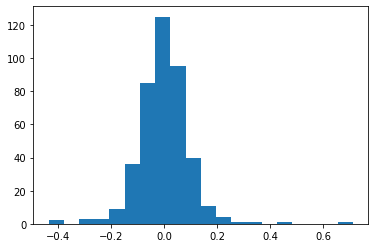

In [31]:
plt.hist(model4.resid, bins=20)
plt.show()

To test if our method is any good at all, we can try with stock prices and VIX index.

In [32]:
sp500 = pd.read_csv('data/SP500.csv', parse_dates=True, index_col='date', dayfirst=True).sort_index()
vix = pd.read_csv('data/VIX.csv', parse_dates=True, index_col='date', dayfirst=True).sort_index()

<AxesSubplot:xlabel='date'>

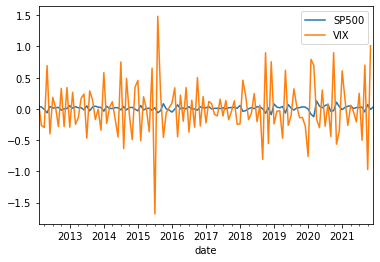

In [33]:
sp500_pct = sp500.pct_change().dropna()
vix_shock = vix.pct_change().diff(-1).dropna()
df2 = sp500_pct.join(vix_shock)
df2.plot()

In [34]:
model7 = news_regression('SP500', 'VIX', df=df2)
model7.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  SP500   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.590
Method:                 Least Squares   F-statistic:                     6.533
Date:                Thu, 30 Dec 2021   Prob (F-statistic):           1.22e-08
Time:                        21:38:34   Log-Likelihood:                 249.69
No. Observations:                 106   AIC:                            -471.4
Df Residuals:                      92   BIC:                            -434.1
Df Model:                          13                                         
Covariance Type:                  HC1                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0100      0.002      4.144      0.000       0.005       0.015
VIX-lag0      -0.0999      0.016     -6.325      0.000      -0.131      -0.069
VIX-lag1      -0.0794      0.020     -4.007      0.000      -0.119      -0.040
VIX-lag2      -0.0553      0.019     -2.876      0.005      -0.093      -0.017
VIX-lag3      -0.0524      0.021     -2.536      0.013      -0.094      -0.011
VIX-lag4      -0.0478      0.023     -2.104      0.038      -0.093      -0.003
VIX-lag5      -0.0509      0.024     -2.111      0.038      -0.099      -0.003
VIX-lag6      -0.0408      0.023     -1.770      0.080      -0.087       0.005
VIX-lag7      -0.0557      0.021     -2.648      0.010      -0.098      -0.014
VIX-lag8      -0.0355      0.019     -1.912      0.059      -0.072       0.001
VIX-lag9      -0.0296      0.016     -1.827      0.071      -0.062       0.003
VIX-lag10     -0.0330      0.015     -2.251      0.027      -0.062      -0.004
VIX-lag11     -0.0202      0.012     -1.745      0.084      -0.043       0.003
VIX-lag12     -0.0061      0.008     -0.794      0.429      -0.022       0.009
==============================================================================
Omnibus:                        6.551   Durbin-Watson:                   2.499
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.550
Skew:                           0.282   Prob(JB):                       0.0139
Kurtosis:                       4.272   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors are heteroscedasticity robust (HC1)
"""

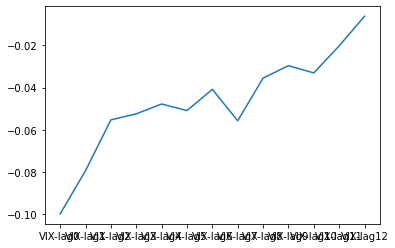

In [35]:
plt.plot(model7.params[1:])

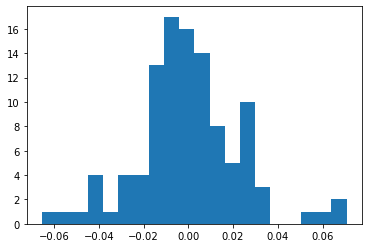

In [36]:
plt.hist(model7.resid, bins=20)
plt.show()